<a href="https://colab.research.google.com/github/LotaSchwager/ADA-Informes/blob/main/Informe_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe sobre Select

## 1. Estadísticos de orden

El estadístico de orden kº es el k-ésimo valor más pequeño de un conjunto de elementos parte de una muestra estadística, los estadísticos de orden son relevantes en la estadística no paramétrica y de inferencia.

El problema de selección se encuentra directamente relacionado con estos **estadísticos**.

## 2. El problema de selección

En el problema de selección, su entrada es similar al de los problemas de ordenamiento, siendo esta la necesidad de tener un arreglo de n números, pero con la adición de un índice $k$ ∈ $[1,2,.....,n]$. Para identificar cuál es el k-ésimo menor número del arreglo entrante.

**Problema de la Seleccion:**

**Entrada:** Conjunto de n elementos con un orden arbitrario $M$, y un índice $k$ ∈ $ [1 , 2, ....., n] $.

**Salida:** Elemento $x$ ∈ $M$ que es el $k$-ésimo menor elemento de $M$.

El elemento $x$ se conoce como *estadístico de orden k-ésimo* para el conjunto $M$.

Por ejemplo:

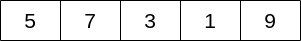

* Si nuestro $k$ es 2 entonces se retorna 3
* Si nuestro $k$ es 3 entonces se retorna 5
* Si nuestro $k$ es 1 entonces retornamos el menor número del arreglo, el 1

Siendo $k$ el índice para encontrar el $k$-ésimo menor número.

Pseudocódigo del problema select.

```
// k es el índice del k-ésimo elemento, pero el k - 1 indica la posición la cual
// estaría el k-ésimo elemento si es que el arreglo estuviera ordenado
función select(arreglo, left, right, k)
        
        //Primero
        if left = right:
            return arreglo[left]

        //Segundo
        pivotPosicion := medianofmedians(arreglo, izq , der)

        //Tercero
        pivotPosicion := partition(arreglo, left, right, pivotPosicion, k - 1)

        //Cuarto
        if pivotPosicion == k - 1: 
            return arreglo[pivotPosicion]

        elif k - 1 < pivotPosicion :
            return select(arreglo, left, pivotPosicion - 1, k)

        else:
            return select(arreglo, pivotPosicion + 1, right, k)
```

Como podemos ver el algoritmo hace lo siguiente:

* **Primero**: Se pregunta si el tamaño del arreglo es 1 en caso de serlo 
  retorna la única posición disponible.

* **Segundo** : Obtener la mediana de las medianas del arreglo.

* **Tercero** : Utilizar la mediana de las medianas como pivote en la 
  función partición y retornar la nueva posición del pivote como también 
  servirá para separar el arreglo en 2 sub-arreglo através de este pivote.

* **Cuarto** :  3 casos

             1. Si k - 1 es igual a la posición del pivote se retorna el 
               arreglo [pivoteposicion].
              
             2. Si k - 1 es menor a la posición del pivote se hará
                llamará la función select nuevamente para realizar la misma 
                operación pero con la parte izquierda.
              
             3. Si k - 1 es mayor a la posición del pivote se hará llamará
                la función select nuevamente para realizar la misma operación 
                pero con la parte derecha. 
              

### 2.1. Mediana de medianas

Esta función se encargará de encontrar la media de un arreglo para que después 
la función partition (la misma usada en el quicksort) lo ocupe como pivote.

Código en Python de la mediana de medianas:

```
#Funcion mediana de medianas hecha por mí con base en un libro
def medianofmedians(arr, izq, der):
    
    #Casos base
    if len(arr) <= 5:
             #Ordena el arreglo y retorna el valor en la mitad del arreglo
             arr = insertionSort_(arr, izq, der)
             mitad = (der - izq + 1) // 2
             return arr[mitad + izq]     
    
    #Arreglos auxiliares
    auxiliar = []
    mediana = []

    #Para los valores del arreglo entrante
    posicion = izq

    #Verifica si se debe seguir poniendo valores dentro de mediana[]
    verificacion = True
    
    #Primer for para rellenar mediana[] respecto al tamaño // 5
    for i in range (0, (der - izq + 1)// 5 + 1):

        #Segundo for para rellenar auxiliar[], este solo se llenara 1 <= x <= 5
        for j in range (0, 5):

            #Si la posicion es igual al tamaño del arreglo deja de añadir     
            #valores a auxiliar[]
            if posicion == der + 1: 
                break
            
            #Se añade el valor del arreglo al auxiliar[] y se le suma +1 a     
            #posicion
            auxiliar.append(arr[posicion])
            posicion += 1
        
        #Se ordena el arreglo auxiliar
        auxiliar = insertionSort_(auxiliar, 0, len(auxiliar) - 1)
        
        #Si auxiliar[] no tiene valores se deja de añadir valores a mediana[]
        if auxiliar == []:verificacion = False

        #Se añade la mediana de auxiliar[] al arreglo mediana[]       
        if verificacion:mediana.append(auxiliar[len(auxiliar) // 2])

        #Se reinicia los valroes del auxiliar[]
        auxiliar = []
    
    #Recursividad
    return medianofmedians(mediana, 0 , len(mediana)- 1)
```

Viendo el código veremos lo que hace:

* Caso base, si el tamaño del arreglo es de 5 o menor

              * Si el arreglo tiene tamaño 1 retornana el unico valor que tiene
              
              * Si no :
              
                * Ordena el arreglo con InsertionSort

                * Retorna la mediana del arreglo siendo el centro de esta

* Declaras variables que se utilizaran:
           * Auxiliar: Aquí se almacenaran los 5 valores donde se sacara su 
             media.
 
           * Mediana: Aquí se almacenará la media de cada Auxiliar creado.

           * Posicion: Este valor se usará para obtener las Posiciones del 
             arreglo de entrada.

           * verificacion: Este booleano está para saber cuando dejar de generar 
             Auxiliares.  

* Primer for es para rellenar Mediana que tendrá tamaño igual al tamaño del 
  arreglo // 5

           * Segundo for es para rellenar el auxiliar

               * Primero se pregunta si la variable posición es igual al tamaño  
                 del arreglo, si es así se saldrá con break

               * Se añade al auxiliar el valor del arreglo[ posición ]

               * A posición se le suma 1

           * Se ordena auxiliar con InsertionSort

           * Se preguntará si auxiliar tiene valores dentro, en caso de no 
             tener valores dentro verificación será false

           * Si verificación es true, se añadirá la media de Auxiliar dentro
             de Mediana

           * Se reinicia los valores de Auxiliar  

* Se llama recursivamente la función pero ahora con el arreglo 
  Mediana                              

### 2.2. Función Partición

La función Partición es similar a la utilizada en el anterior informe sobre el QuickSort, utilizando como pivote el último elemento y reordenando el arreglo a través de ese pivote, solo que en este caso hay un ligero cambio.

Primero el pivote a usar tiene que ser la media entregada por la Mediana de 
medianas y para eso:

* Se busca la posición de la media usando la función index

* Se da a la variable x (pivote) la media

* Se intercambia de posición el último elemento con la media (En caso de que la 
  posición de la media no sea la última posición del arreglo)

El resto de la función es exactamente la misma usada en el anterior informe.  

### 2.3. Ejemplo

Por ejemplo tomemos el siguiente arreglo $[6,3,9,10,12,16,17,20,1,4]$ y 
queremos ver cuál es el 5to elemento más pequeño del arreglo.

Viendo el código del select abra que ver los pasos previamente vistos:

* Primero: Se ve si cumple el caso de que el tamaño es 1, en este caso no se 
  cumple

* Segundo: Se obtiene la media de medianas del arreglo.
  

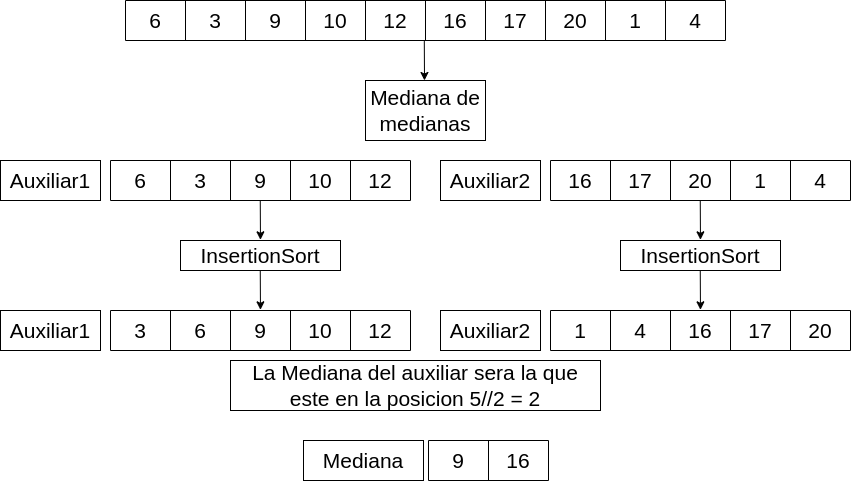

Una vez obtenidas el arreglo con las medianas de cada auxiliar se vuelve a llamar la función de las medianas, pero esta vez recursivamente llamando a la mediana $[9,16]$.

Una vez entrada la mediana se ve que tiene un tamaño de 2 por lo que entrada al 
caso base.

Ya que el tamaño es mayor a 1, ordena el arreglo (aunque en este caso este 
ordenado), para que finalmente se retorne el valor central del arreglo tomando el tamaño del arreglo y dividiéndolo en 2.

Por lo que la mediana de medianas del arreglo es 16.

* Tercero: Ya obtenido el pivote (16). Habrá que entrar a la función 
  partition ya conocida del QuickSort.

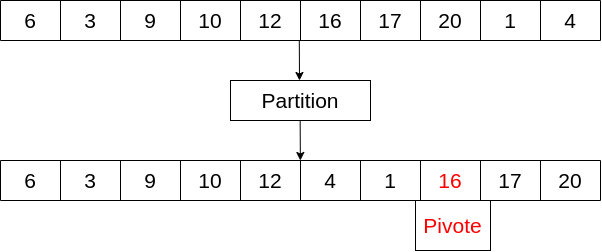

* Cuarto: En este caso preguntaremos si 16 es el 5to menor número del arreglo
    lamentablemente es falso, por lo que veremos si la posición del pivote es menor o mayor a la posición correspondiente del 5to menor número y resulta es que es mayor debido a que la posición correspondiente al 16 es el 7 mientras que la posición del 5to número es el 4.

*Por lo que se llamara recursivamente, pero esta vez solo se usara la parte de la izquierda del pivote usado o sea.

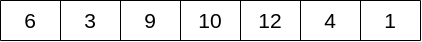

* Primero: Tampoco cumple el caso base.

* Segundo: Busca de nuevo la media del arreglo 

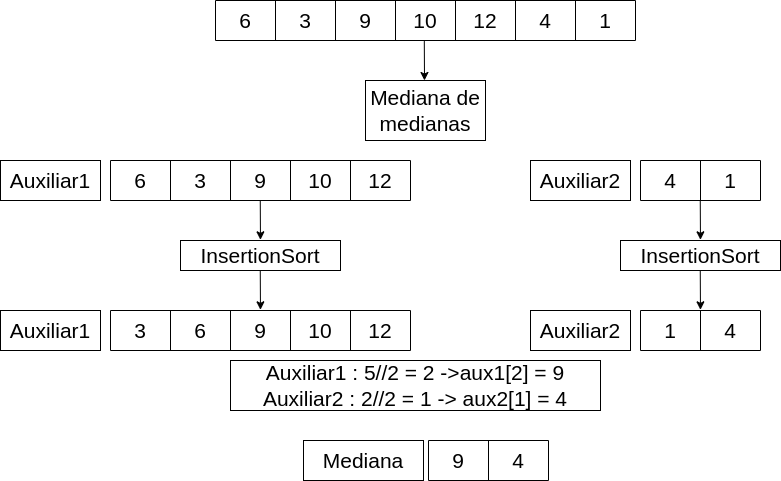

Una vez obtenidas el arreglo con las medianas de cada auxiliar se vuelve a llamar la función de las medianas, pero esta vez recursivamente llamando a la mediana $[9,4]$.

Una vez entrada la mediana se ve que tiene un tamaño de 2 por lo que entrada al caso base.

Ya que el tamaño es mayor a 1, ordena el arreglo pasando de $[9,4]$ a $[4,9]$, para que finalmente se retorne el valor central del arreglo tomando el tamaño del arreglo y dividiéndolo en 2.

Por lo que la mediana de medianas del arreglo es 9.

* Tercero: Ya obtenido el pivote (9). Habrá que entrar a la función 
  partition ya conocida del QuickSort.

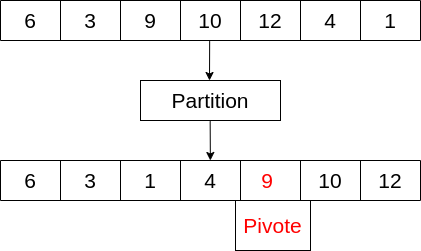

* Cuarto: En este caso preguntaremos si 9 es el 5to menor número del arreglo
    y resulta que si, debido a que 9 está en la posición 4 que es la misma posición del 5to menor número del arreglo, por lo que se termina la recursión del select y se termina todo.

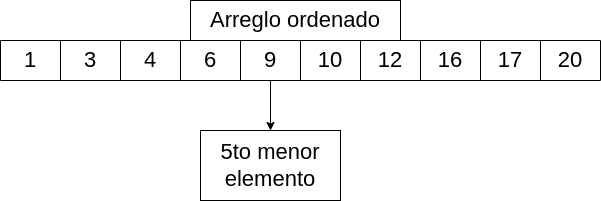

## 3. Implementación

Implementación del algoritmo select en python.

In [35]:
from termcolor import colored
repeticiones = 0
comparaciones = 0

#Funcion partition que utiliza como pivote el ultimo elemento del arreglo
def partition(arr, l, r, pivotardo):
    global comparaciones
    #Se busca la posicion del pivote encontrado del mediana de medianas
    posicion = arr.index(pivotardo)

    #X es el pivote
    x = pivotardo

    #Si la posicion de la media no es la ultima posicion
    #Se intercambian de posiciones la media con el ultimo elemento
    if posicion != r:
        arr[r], arr[posicion] = arr[posicion], arr[r]
    
    #El resto de la funcion es exactamente la misma usado en QuickSort
    i = l
    for j in range(l, r):
        comparaciones += 1  
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1

           
    arr[i], arr[r] = arr[r], arr[i] 
    
    return i

#Funcion InsertionSort recogido desde el informe del bucketsort
def insertionSort_(arr, izq, der):
    for i in range(izq, der + 1):
        up = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > up:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = up
  	
    return arr

# Funcion mediana de medianas hecha por mí (Ojala este bien hecha xd)
def medianofmedians(arr, izq, der, verbose = False):
    global repeticiones
    global comparaciones

    if verbose == True:
            print(colored(f"\n----------- mediana de medianas --------------","red")) 
            print("Arreglo :", str(arreglo[izq:der + 1]))

    #Casos bases (cuando el tamaño del arreglo entrante es menor o igual a 5)
    if (der - izq) + 1 <= 5:

        if verbose == True:
            print(colored(f"\n----------- Caso Base --------------","red")) 
        
        #Si el arreglo tiene tamaño 1 retorna el unico valor que tiene
        if izq == der : return arr[der]

        #Ordena el arreglo y retorna el valor en la mitad del arreglo
        arr = insertionSort_(arr, izq, der)
        mitad = (der - izq + 1) // 2
        if verbose == True:
            print(colored(f"\n----------- Mediana encontrada --------------","red")) 
            print("Pivote elegido :",arr[mitad + izq])

        return arr[mitad + izq]     

    #Arreglos auxiliares
    auxiliar = []
    mediana = []

    #Para los valores del arreglo entrante
    posicion = izq

    #Verifica si se debe seguir poniendo valores dentro de mediana[]
    verificacion = True

    #Primer for para rellenar mediana[] respecto al tamaño // 5
    for i in range (0, (der - izq + 1)// 5 + 1):

        if verbose == True:
                 print(colored(f"\n----------- Rellenando Auxiliar --------------","red")) 

        #Segundo for para rellenar auxiliar[], este solo se llenara 1 <= x <= 5
        for j in range (0, 5):
            repeticiones += 1
            comparaciones += 1
            if verbose == True:
                 print("Auxiliar:",str(auxiliar))

            #Si la posicion es igual al tamaño del arreglo deja de añadir     
            #valores a auxiliar[]
            if posicion == der + 1:

                if verbose == True:
                   print(colored(f"\n----------- Se deja de rellenar Auxiliar --------------","red")) 
                   
                break

            #Se añade el valor del arreglo al auxiliar[] y se le suma +1 a     
            #posicion
            auxiliar.append(arr[posicion])
            posicion += 1

        #Se ordena el arreglo auxiliar
        if verbose == True and auxiliar != []:
                 print(colored(f"\n----------- Auxiliar se ordenar --------------","red")) 
                 print("Auxliar :", str(auxiliar))

        auxiliar = insertionSort_(auxiliar, 0, len(auxiliar) - 1)

        if verbose == True and auxiliar != []:
                print("Auxliar ordenado :", str(auxiliar))

        #Si auxiliar[] no tiene valores se deja de añadir valores a mediana[]
        if auxiliar == []:verificacion = False

        #Se añade la mediana de auxiliar[] al arreglo mediana[]
        if verbose == True and auxiliar != []:
                 print(colored(f"\n----------- Rellenando Mediana --------------","red")) 

        if verificacion:mediana.append(auxiliar[len(auxiliar) // 2])

        if verbose == True and auxiliar != []:
                print("Mediana :", str(mediana))
                print("Se reinicia los valores de auxiliar")

        #Se reinicia los valroes del auxiliar[]
        auxiliar = []
    
    if verbose == True:
                 print(colored(f"\n----------- Recursividad --------------","red")) 
                 print("Mediana : ", str(mediana))

    #Recursividad
    return medianofmedians(mediana, 0 , len(mediana)- 1, verbose)

#Funcino select que recibe el : 
# arreglo, sus posiciones y el k-ésimo numero a buscar
def select(arreglo, izq, der, k, verbose = False):
        
        if verbose == True:
            print(colored(f"\n----------- Select --------------","blue")) 
            print("Arreglo :", str(arreglo[izq:der + 1]))
        
        #Si el tamaño del arreglo es 1 retorna su unico valor
        if izq == der:
            return arreglo[izq]
        
        #Se obtiene la media de medianas para utilizarlo de pivote
        pivotPosicion = medianofmedians(arreglo, izq , der, verbose)

        #Se obtiene la posicion del pivote
        pivotPosicion = partition(arreglo, izq, der, pivotPosicion)
        
        if verbose == True:
            print(colored(f"\n----------- Despues de Partition --------------","blue")) 
            print("\nArreglo con partition :", str(arreglo[izq:der + 1]))
            print("Posicion del pivote = ", pivotPosicion, "Sera igual a",k-1, "?")

        #Se compara si la posicion del pivote es el k-ésimo valor buscado - 1
        if pivotPosicion == k - 1:

            if verbose == True:
                 print(colored(f"\n----------- K-ésimo menor numero encontrado --------------","blue")) 
                 print("K-ésimo menor numero es ", arreglo[pivotPosicion]) 
            #Retorna el pivote
            return arreglo[pivotPosicion]
        
        #Si la posicion del pivote es mayor
        elif k - 1 < pivotPosicion :

            if verbose == True:
                 print(colored(f"\n----------- Recursividad con el arreglo izquierdo del pivote --------------","blue")) 
   
            #Recursivida con el arreglo izquierdo del pivote
            return select(arreglo, izq, pivotPosicion - 1, k, verbose)
        
        #Si la posicion del pivote es menor
        else:

            if verbose == True:
                 print(colored(f"\n----------- Recursividad con el arreglo derecho del pivote --------------","blue")) 

            #Recursividad con el arreglo derecho del pivote
            return select(arreglo, pivotPosicion + 1, der, k,verbose)

#Ejemplo
arreglo = [6,3,9,10,12,16,17,20,1,4]

print("----------- Inicio de la recursion -----------")
print("\nArreglo de entrada:", str(arreglo))
numero = select(arreglo, 0, len(arreglo)-1, 5)
print("\n----------- Fin de la recursion --------------")
print("\nEl k-ésimo menor numero es : ", numero)
print("la funciones Mediana de medianas comparo :", repeticiones, "veces")
print("Select comparo :", comparaciones, "veces")

----------- Inicio de la recursion -----------

Arreglo de entrada: [6, 3, 9, 10, 12, 16, 17, 20, 1, 4]

----------- Fin de la recursion --------------

El k-ésimo menor numero es :  9
la funciones Mediana de medianas comparo : 19 veces
Select comparo : 34 veces


### 3.1 Verbose = True

In [27]:
arr = [3,6,8,4,5,1,2,9,7,14,12]

print("----------- Inicio de la recursion -----------")
print("\nArreglo de entrada:", str(arreglo))
numero = select(arr, 0, len(arr)-1, 7, True)
print("\n----------- Fin de la recursion --------------")
print("\nEl k-ésimo menor numero es : ", numero)

----------- Inicio de la recursion -----------

Arreglo de entrada: [6, 3, 1, 4, 9, 10, 12, 16, 17, 20]

----------- Select --------------
Arreglo : [3, 6, 8, 4, 5, 1, 2, 9, 7, 14, 12]

----------- mediana de medianas --------------
Arreglo : [6, 3, 1, 4, 9, 10, 12, 16, 17, 20]

----------- Rellenando Auxiliar --------------
Auxiliar: []
Auxiliar: [3]
Auxiliar: [3, 6]
Auxiliar: [3, 6, 8]
Auxiliar: [3, 6, 8, 4]

----------- Auxiliar se ordenar --------------
Auxliar : [3, 6, 8, 4, 5]
Auxliar ordenado : [3, 4, 5, 6, 8]

----------- Rellenando Mediana --------------
Mediana : [5]
Se reinicia los valores de auxiliar

----------- Rellenando Auxiliar --------------
Auxiliar: []
Auxiliar: [1]
Auxiliar: [1, 2]
Auxiliar: [1, 2, 9]
Auxiliar: [1, 2, 9, 7]

----------- Auxiliar se ordenar --------------
Auxliar : [1, 2, 9, 7, 14]
Auxliar ordenado : [1, 2, 7, 9, 14]

----------- Rellenando Mediana --------------
Mediana : [5, 7]
Se reinicia los valores de auxiliar

----------- Rellenando Auxiliar -

## 4. Correctitud

Primero, para comprobar la correctitud del select habrá que tener en cuenta que:

* Se tomara a InsertionSort como correcto
* Se tomara a la función Partition como correcto

### Teorema 1 (correctitud del medianofmedians)

El algoritmo medianofmedians recibe un arreglo $A = [a_1, a_2,......,a_n]$ 
juntos con las posiciones inicial y final del propio arreglo para retornar la mediana a través de un sub-arreglo de tamaño 5 o menor, este sub-arreglo se crea a través del mismo medianofmedians.

#### Prueba del Teorema

**Caso Base ($1 \geq n \geq 5$) :**  Si el arreglo tiene un tamaño de 5 o menor.

Si el tamaño es 1, retorna su único valor, Trivialmente este elemento es la mediana del arreglo.

Si el tamaño es 2 hasta 5, ordenará el arreglo con InsertionSort y se retornara
el valor que está en medio del arreglo.

**Caso General ($n > 5$):** Si el arreglo $A$ tiene tamaño es $m < n$.

Si el arreglo tiene un tamaño $n$, el algoritmo dividirá este arreglo en n/5 
sub-arreglos de tamaño 5 y a cada sub-arreglo se ordenará con InsertionSort, después a un sub-arreglo de medianas se le rellenara con cada mediana proveniente de los sub-arreglos ordenados.

A este sub-arreglo de mediana se le aplica de nuevo la función medianofmedians, repitiéndose este proceso hasta que se cumpla el caso base.

Finalmente, el algoritmo retorna la mediana del sub-arreglo que cumple con el caso base.

Como podemos ver la función medianofmedians es correcto.

### Teorema 2 (correctitud del algoritmo Select)

El algoritmo Select recibe un arreglo $A = [a_1, a_2,......,a_n]$, con un índice, retornando el k-ésimo menor número del arreglo, es decir, que si se ordena el arreglo de menor a mayor se entregó el elemento de la posición k-ésimo - 1.

#### Prueba del Teorema

**Caso Base ($n = 1$):** Si el arreglo tiene tamaño 1, el algoritmo retorna el único elemento del arreglo. Trivialmente es el elemento k-ésimo menor.

**Caso General ($n > 1$):** Si el arreglo $A$ tiene tamaño es $m < n$.

Si el arreglo tiene un tamaño $n$, el algoritmo obtendrá la mediana de medianas de la función medianofmedians, después de obtener la mediana esta misma se utilizará como pivote en la función partition y con esta función se obtendrá la posición de ese pivote una vez reordenar a través del propio pivote.

Si la posición del pivote es igual al k-ésimo - 1 se retorna el verlo del arreglo en la posición del pivote.

Si no se cumple Select volverá a realizar la misma tarea de manera recursiva.

Como InsertionSort, Partition, medianofmedians son correctos, podemos decir que Select también lo es, ya que esas funciones cumplen con su propósito Select eventualmente encontrara al k-ésimo menor número, por lo que Select también es correcto.

## 5. Tiempo de Ejecución

El tiempo de ejecución del Select es $O(n)$. Pero como el Select puede tener una complejidad lineal cuando otros algoritmos recursivos son por lo general $O(n log n)$ o peores.

Pasos del Select:
 
1. Mediana de medianas

2. Partition

3. Recursividad del Select

**Partition** al no ser recursivo y como recorre todo el arreglo esta tiene una complejidad de $O(n)$.

**Mediana de medianas**, al tomar un arreglo de tamaño $n$ esta los va dividiendo en $n/5$ sub-arreglos de tamaño 5.

Debido a la recursividad, esta siempre utilizará un arreglo con tamaño n/5.

$$T(n) = T(n/5) + dn + c$$

Que es alfinal una complejidad $O(n)$.
#### Recursividad del Select

Mediana de medianas devolverá una mediana verdadera que representa todo el arreglo, dado que cada uno de los M elementos es mayor y menor que al menos otros dos elementos en sus sub-arreglos anteriores, por lo tanto, la verdadera, la mediana es mayor que y menor que al menos $3n/10$, percentil 30 de elementos del arreglo completo.

Y sumado a que partition reorganiza los valores del arreglo a través del pivote
entregado por Mediana de medianas, tenemos qué.

$$T(n) = T(7n/10)$$ 

Obteniendo algo como esto

**Select :**

$$T(n) = T(n/5) + T(7n/10) + O(n)$$ 

Siendo esto Complejidad de O(n).

## 6. Experimento

### Randomized Select vs Select

Ahora vamos a comparar Select con su compañera Randomized Select cuya mayor diferencia es que esta última utiliza como pivote un elemento al azar del arreglo.

Randomized Select :

In [31]:
def rselect(seq,i):
    if len(seq)<=i:return seq
    lo,pi,hi= random_partition(seq)
    if i < len(lo):return rselect(lo,i) 
    if i < len(seq)-len(hi): return pi 
    return rselect(hi,i-(len(seq)-len(hi)))
    
from random import choice

def random_partition(seq):

    pi =choice(seq)
    lo=[x for x in seq if x<pi]
    hi=[x for x in seq if x>pi]
    return lo,pi,hi

Para comparar los 2 algoritmos se usará arreglos de tamaño 5 hasta 199, estos arreglos pueden contener números aleatorios del 1 hasta el 1000.

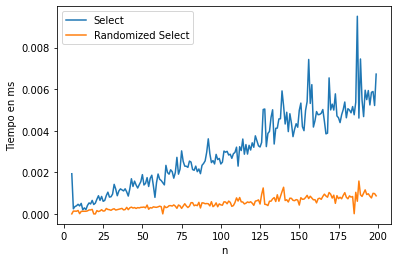

In [34]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random

x=[]
y_select = []
y_randomized = []

for n in range(5,200):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)

  k = random.randint(1,n)

  t_select = repeat(setup="from __main__ import select", stmt=f"select({a},{0},{len(a)-1},{k})", repeat=1, number=10)
  t_random = repeat(setup="from __main__ import rselect", stmt=f"rselect({b},{k})", repeat=1, number=10)

  x.append(n)
  y_select.append(t_select)
  y_randomized.append(t_random)


plt.plot(x,y_select)
plt.plot(x,y_randomized)

plt.legend(["Select", "Randomized Select"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### Analisis del grafico

La teoría indicaba que Select es más rápido que Randomized Select, y esta diferencia puede deberse a la función Medianas de medianas realizada por mí, utilizando un contador para saber cuantas comparaciones realizo, se podía ver que esta realizaban n² comparaciones aproximadamente (no quedo bien la función parece, me di cuenta retarde).

### Casos hipotéticos del Select

Viendo lo mal que me salió la función Mediana de medianas veamos como le va con los casos hipotéticos:

*   Cantidad de comparaciones del peor caso (sé que puse sobre select solo 
    tiene O(n) pero debido a que implemente de no muy buena manera una función 
    habrá que ver cuanto se desvía de la función lineal.

*   Cantidad de comparaciones del Select usado en este informe.

*   Cantidad de comparaciones del Select según el tiempo de ejecución.

Para tamaños de problema entre 5 y 500, como también los valores dentro de los arreglos son aleatorios (entre 1 y 999).

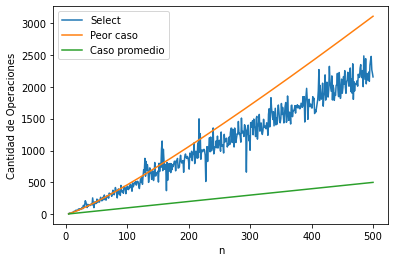

In [40]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,501)] 
y1=[n*math.log(n) for n in range(5,501)] # peor caso hipotetico para comparar
y2=[n for n in range(5,501)] # caso matematico del select
y=[]; 

for n in range(5,501):
  comparaciones = 0
  a = random.sample(range(1, 1000), n)
  k = random.randint(1,n) 

  a = select(a,0,len(a)-1, k)
  y.append(comparaciones)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Peor caso", "Caso promedio"])

plt.xlabel('n')
plt.ylabel('Cantidad de Operaciones')
plt.show()

#### Análisis del gráfico

Viendo como crece Select se puede ver que está más cerca del Peor caso determinado por mí siendo $O(n log n)$, simplemente para ver un poco que tanto se diferencia de la complejidad lineal que tiene Select en realidad, puedo determinar que si hubiera hecho una función Mediana de medianas con menor iteraciones posiblemente hubiera obtenido mejores resultado en el experimento contra el Randomized Select.